<br>
<font size='6'><b>Introdution to Numpy</b></font><br><br>

- by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/)
    - Adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial .

- Neil Lawrence
    - 11th February 2014 [Gaussian Process](http://ml.dcs.shef.ac.uk/gpss/gprs14/) Road Show, Pereira, Colombia


<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        Collected by Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

$$\newcommand{\inputScalar}{x}
\newcommand{\inputVector}{\mathbf{x}}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\dataScalar}{y}
\newcommand{\dataVector}{\mathbf{y}}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\lengthScale}{\ell}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{w}}
\newcommand{\mappingFunctionScalar}{f}
\newcommand{\mappingFunctionVector}{\mathbf{f}}
\newcommand{\dataStd}{\sigma}
\newcommand{\numData}{n}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\zerosVector}{\mathbf{0}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\mathbf{\epsilon}}
\newcommand{\noiseMatrix}{\mathbf{\Epsilon}}
\newcommand{\basisMatrix}{\mathbf{\Phi}}
\newcommand{\basisVector}{\mathbf{\phi}}
\newcommand{\basisScalar}{\phi}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\meanVector}{\boldsymbol{\mu}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{\kernelScalar}}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\meanScalar}{\mu}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}$$

Welcome to the IPython notebook! We will be using the IPython notebook for all our lab classes and assignments. It is a really convenient way to interact with data using python. In this first lab session we are going to familiarise ourselves with the notebook and start getting used to python whilst we review some of the material from the first lecture.

Python is a generic programming language with 'numerical' and scientific capabilities added on through the numpy and scipy libraries. There are excellent 2-D plotting facilities available through matplotlib.

Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for Matlab users page (http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users.html).

In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

# 1. Python Basics



## 1.1. Types

### Numbers

Integers and floats work as you would expect from other languages:

In [1]:
x = 3
class(x)

x =

     3


ans =

double

In [2]:
x+1  % Addition;
x-1  % Subtraction;
x*2  % Multiplication;
x^2  % Exponentiation;

ans =

     4


ans =

     2


ans =

     6


ans =

     9

In [3]:
y = 2.5
class(y)
[y, y+1, y*2, y^2]

y =

    2.5000


ans =

double


ans =

    2.5000    3.5000    5.0000    6.2500

Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [4]:
t = true; f = false;
class(t) % Prints "<type 'logical'>"

ans =

logical

In [5]:
t & f   % Logical AND;
t || f  % Logical OR;
~t      % Logical NOT;
t ~= f  % Logical XOR;

ans =

     0


ans =

     1


ans =

     0


ans =

     1

### Strings

In [6]:
hello = 'hello';   % String literals can use single quotes
world = 'world';   % or double quotes; it does not matter.
hello
length(hello)

hello =

hello


ans =

     5

In [7]:
hw = [hello, ' ', world];  % String concatenation
hw  % prints "hello world"

hw =

hello world

In [8]:
xs = [3, 1, 2];   % Create a list
[xs, xs(2)]

ans =

     3     1     2     1

# 2. Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

The numpy library provides most of the manipulations we need for arrays in python. numpy is short for numerical python, but as well as providing the numerics, numpy provides contiguous array objects. These objects weren't available in the original python. The first step is to import numpy. We'll then use it to draw samples from a "standard normal". A standard normal is a Gaussian density with mean of zero and variance of one. We'll draw 10 samples from the standard normal.

## 2.1. Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [9]:
a = [1, 2, 3];  % Create a rank 1 array from list
[a(1), a(2), a(3)]
a(1) = 5       % Change an element of the array

ans =

     1     2     3


a =

     5     2     3

In [10]:
b = [1,2,3,
     4,5,6]   % Create a rank 2 array

b =

     1     2     3
     4     5     6

In [11]:
[b(1, 1), b(1, 2), b(2, 1)]

ans =

     1     2     4

Numpy also provides many functions to create arrays:

In [12]:
a = zeros(2,2)  % Create an array of all zeros

a =

     0     0
     0     0

In [13]:
b = ones(1,2)   % Create an array of all ones

b =

     1     1

In [14]:
d = eye(2)        % Create a 2x2 identity matrix

d =

     1     0
     0     1

In [15]:
e = rand(2,2) % Create an array filled with random values

e =

    0.8147    0.1270
    0.9058    0.9134

## 2.2. Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [16]:
a = [1, 2, 3, 4,
     5, 6, 7, 8,
     9,10,11,12];
b = a(1:2, 2:3)

b =

     2     3
     6     7

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing.

Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array:

In [17]:
% Create the following rank 2 array with shape (3, 4)
a = [1, 2, 3, 4,
     5, 6, 7, 8,
     9,10,11,12]

a =

     1     2     3     4
     5     6     7     8
     9    10    11    12

In [18]:
row_r1 = a(2, :);    % Rank 1 view of the second row of a  
row_r2 = a(2:3, :);  % Rank 2 view of the second row of a
disp(row_r1) 
disp(row_r2)

5     6     7     8

     5     6     7     8
     9    10    11    12

In [19]:
% We can make the same distinction when accessing columns of an array:
    
a = [1, 2, 3, 4,
     5, 6, 7, 8,
     9,10,11,12];

col_r1 = a(:, 2)
col_r2 = a(:, 2:3)

col_r1 =

     2
     6
    10


col_r2 =

     2     3
     6     7
    10    11

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [20]:
a = [1, 2,
     3, 4,
     5, 6]

bool_idx = (a > 2)  % Find the elements of a that are bigger than 2;
                    % this returns a numpy array of Booleans of the same
                    % shape as a, where each slot of bool_idx tells
                    % whether that element of a is > 2.

a =

     1     2
     3     4
     5     6


bool_idx =

     0     0
     1     1
     1     1

## 2.3. Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [21]:
x = [1,2,
     3,4];
y = [5,6,
     7,8];

% Elementwise sum; both produce the array
x + y

ans =

     6     8
    10    12

In [22]:
% Elementwise difference; both produce the array
x - y

ans =

    -4    -4
    -4    -4

In [23]:
% Elementwise product; both produce the array
x .* y

ans =

     5    12
    21    32

In [24]:
% Elementwise division; both produce the array
x ./ y

ans =

    0.2000    0.3333
    0.4286    0.5000

In [25]:
% Elementwise square root; produces the array
sqrt(x)

ans =

    1.0000    1.4142
    1.7321    2.0000

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [26]:
x = [1,2,
     3,4];
y = [5,6,
     7,8];
 
v = [9, 10];
w = [11,12];

% Inner product of vectors; both produce 219
dot(v, w)

ans =

   219

Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum:

In [27]:
x = [1,2,
     3,4];
 
sum(x) % Default : Compute sum of each column; prints "[4 6]"
sum(x, 1) % Compute sum of each column; prints "[4 6]"
sum(x, 2) % Compute sum of each row; prints "[3 7]"

sum(sum(x))

ans =

     4     6


ans =

     4     6


ans =

     3
     7


ans =

    10

You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [28]:
x
x'

x =

     1     2
     3     4


ans =

     1     3
     2     4

In [29]:
v = [1 2 3]
v'

v =

     1     2     3


ans =

     1
     2
     3

# 3. Plotting in Python

We'll now plot the variance and the mean against the number of samples. To do this, we need to first convert the samples, varianes and means from Python lists, to numpy arrays.

In [30]:
% python list
means = [];
variances = [];

samples = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000] ;

for n = 1:length(samples)
    x = rand(1, n);
    M = mean(x);
    variance = mean(x.^2) - M^2;
    means = [means M];
    variances = [variances, variance];
end

Next we need to include the plotting functionality from matplotlib, and instruct IPython notebook to include the plots *inline* with the notebook, rather than in a different window. First we import the plotting library, matplotlib.

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

By running this special iPython command, we will be displaying plots inline:

In [31]:
%import matplotlib.pyplot as plt
%%matplotlib inline

## Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

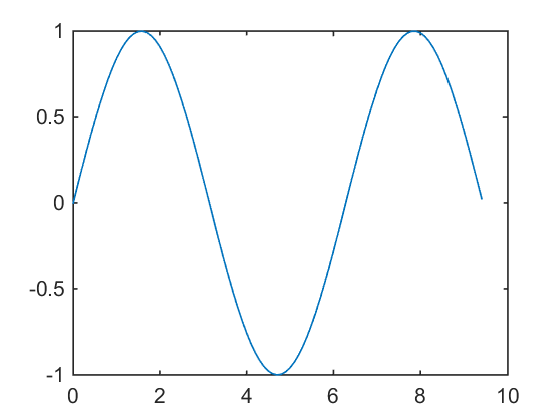

In [32]:
% Compute the x and y coordinates for points on a sine curve
x = 0:0.1:3*pi;
y = sin(x);

plot(x, y);

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

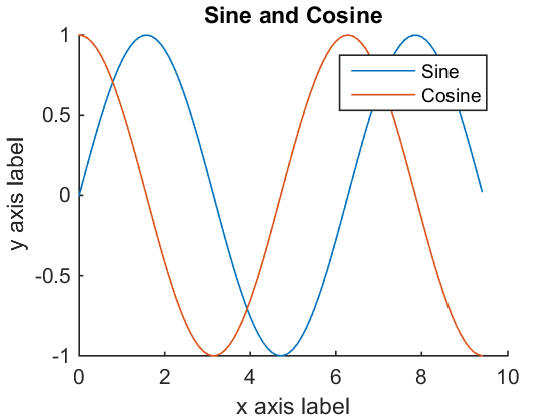

In [33]:
y_sin = sin(x);
y_cos = cos(x);

% Plot the points using matplotlib
figure(1); hold on;
plot(x, y_sin)
plot(x, y_cos)

xlabel('x axis label')
ylabel('y axis label')
title('Sine and Cosine')
legend('Sine', 'Cosine')

Here we plot the estimated mean against the number of samples. However, since the samples go up logarithmically it's better to use a logarithmic axis for the x axis, as follows.

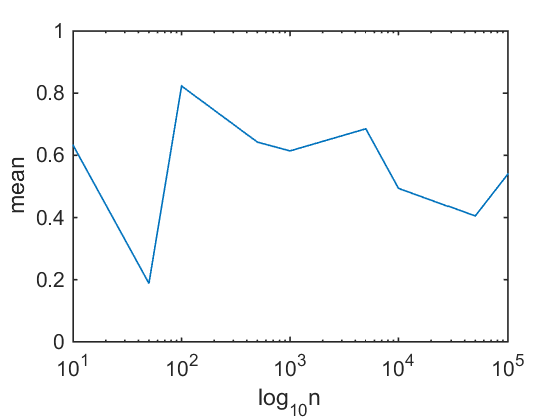

In [34]:
semilogx(samples, means)
xlabel('log_{10}n')
ylabel('mean')

We can do the same for the variances, again using a logarithmic axis for the samples. This time, we're going to lavel the x axis using a latex formula.

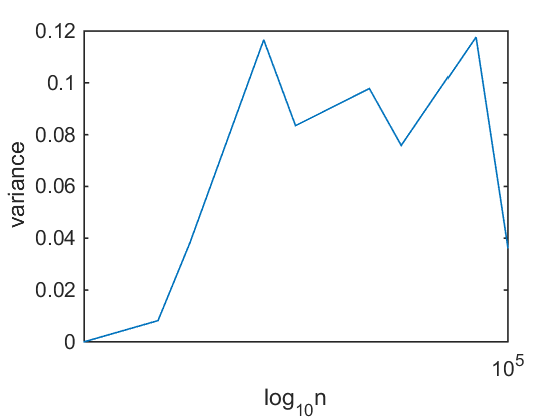

In [35]:
semilogx(samples, variances)
xlabel('log_{10}n')
ylabel('variance')

## Subplots 
You can plot different things in the same figure using the subplot function. You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

Here is an example:

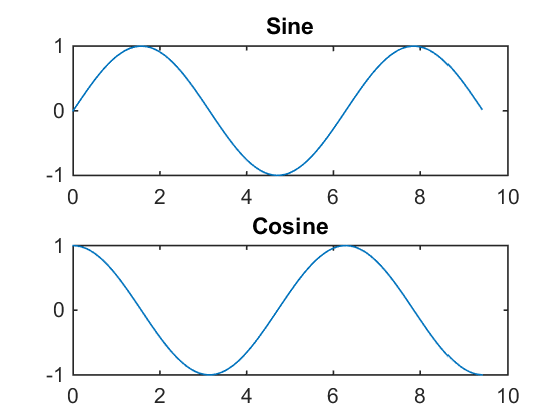

In [36]:
% Compute the x and y coordinates for points on sine and cosine curves
x = 0:0.1:3 * pi;
y_sin = sin(x);
y_cos = cos(x);

% Set up a subplot grid that has height 2 and width 1,
% and set the first such subplot as active.
subplot(2, 1, 1)

% Make the first plot
plot(x, y_sin)
title('Sine')

% Set the second subplot as active, and make the second plot.
subplot(2, 1, 2)
plot(x, y_cos)
title('Cosine')

In [37]:
%%html
<iframe src="https://www.youtube.com/embed/QE7UzVG1o-I"
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [38]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>